In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Travelers/Training_TriGuard.csv')
df.head(10)

,subrogation,claim_number,year_of_born,gender,email_or_tel_available,safety_rating,annual_income,high_education_ind,address_change_ind,living_status,...,claim_est_payout,vehicle_made_year,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,age_of_DL,accident_type,in_network_bodyshop,vehicle_mileage
0,1.0,6090851,1990.0,F,0.0,75.0,70966.0,1.0,1.0,Rent,...,3218.84,2021.0,Large,16272.12725,red,21620.79697,25.0,multi_vehicle_clear,no,75421.0
1,0.0,4653734,1972.0,F,1.0,94.0,79723.0,1.0,1.0,Rent,...,1338.52,2025.0,Medium,34102.78197,silver,10840.58520,23.0,multi_vehicle_clear,yes,31988.0
2,0.0,1014777,2003.0,F,1.0,76.0,41527.0,1.0,1.0,Own,...,3540.05,2022.0,Compact,15000.00000,silver,24318.12282,23.0,multi_vehicle_unclear,yes,60876.0
3,1.0,8101873,1983.0,F,1.0,54.0,42099.0,1.0,1.0,Rent,...,1507.94,2025.0,Medium,16984.45295,white,36958.26656,23.0,multi_vehicle_unclear,yes,152772.0
4,0.0,5081870,1985.0,F,1.0,54.0,47206.0,1.0,1.0,Own,...,5080.63,2021.0,Compact,46545.72863,blue,11779.17422,17.0,multi_vehicle_clear,yes,41151.0
5,0.0,6723161,2002.0,M,1.0,95.0,88645.0,1.0,0.0,Rent,...,2129.24,2021.0,Compact,15000.00000,black,20814.04703,26.0,single_car,no,104986.0
6,0.0,5614715,1965.0,F,1.0,93.0,76946.0,0.0,0.0,Own,...,568.92,2020.0,Large,15000.00000,black,18049.06487,18.0,single_car,no,44837.0
7,0.0,7910228,1967.0,F,0.0,90.0,57836.0,1.0,1.0,Own,...,3225.25,2022.0,Medium,30728.89812,gray,27526.74415,21.0,single_car,yes,97181.0
8,0.0,3766827,1958.0,M,0.0,75.0,38542.0,0.0,1.0,Own,...,2703.43,2026.0,Large,15000.00000,blue,17907.09480,22.0,multi_vehicle_unclear,no,67395.0
9,0.0,6847058,1987.0,M,1.0,79.0,117178.0,0.0,1.0,Own,...,1868.30,2024.0,Large,29082.89096,gray,22682.11218,24.0,multi_vehicle_unclear,yes,88224.0


In [5]:
df_sub = df[df.subrogation == 1]
df_nosub = df[df.subrogation == 0]

In [26]:
cols = df.columns
print(cols)

Index(['subrogation', 'claim_number', 'year_of_born', 'gender',
       'email_or_tel_available', 'safety_rating', 'annual_income',
       'high_education_ind', 'address_change_ind', 'living_status', 'zip_code',
       'claim_date', 'claim_day_of_week', 'accident_site',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'vehicle_made_year',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'age_of_DL', 'accident_type', 'in_network_bodyshop', 'vehicle_mileage'],
      dtype='object')


In [19]:
categorical_vars = [
    "subrogation",
    "gender",
    "email_or_tel_available",
    "high_education_ind",
    "address_change_ind",
    "living_status",
    "zip_code",
    "claim_day_of_week",
    "accident_site",
    "witness_present_ind",
    "channel",
    "policy_report_filed_ind",
    "vehicle_category",
    "vehicle_color",
    "accident_type",
    "in_network_bodyshop"
]




In [28]:
numerical_vars = [
    "claim_number",
    "year_of_born",
    "safety_rating",
    "annual_income",
    "past_num_of_claims",
    "liab_prct",
    "claim_est_payout",
    "vehicle_made_year",
    "vehicle_price",
    "vehicle_weight",
    "age_of_DL",
    "vehicle_mileage"
]


In [23]:
for col in categorical_vars:
    print("=" * 60)
    print(f"🔹 Column: {col}\n")

    # Value counts (absolute counts)
    sub_counts = df_sub[col].value_counts(dropna=False)
    nosub_counts = df_nosub[col].value_counts(dropna=False)
    total_counts = df[col].value_counts(dropna=False)

    # Ratios (percentage of total)
    sub_ratio = sub_counts / len(df_sub)
    nosub_ratio = nosub_counts / len(df_nosub)
    total_ratio = total_counts / len(df)

    # Print results

    print("📌 Subrogation = 1")
    print(pd.DataFrame({"count": sub_counts, "ratio": sub_ratio.round(3)}))
    print()

    print("📌 Subrogation = 0")
    print(pd.DataFrame({"count": nosub_counts, "ratio": nosub_ratio.round(3)}))
    print("\n")

    print("📌 Total")
    print(pd.DataFrame({"count": total_counts, "ratio": total_ratio.round(3)}))
    print("=" * 60)
    print()


🔹 Column: subrogation

📌 Subrogation = 1
             count  ratio
subrogation              
1.0           4115    1.0

📌 Subrogation = 0
             count  ratio
subrogation              
0.0          13884    1.0


📌 Total
             count  ratio
subrogation              
0.0          13884  0.771
1.0           4115  0.229
NaN              2  0.000

🔹 Column: gender

📌 Subrogation = 1
        count  ratio
gender              
F        2180   0.53
M        1935   0.47

📌 Subrogation = 0
        count  ratio
gender              
M        7337  0.528
F        6547  0.472


📌 Total
        count  ratio
gender              
M        9273  0.515
F        8727  0.485
NaN         1  0.000

🔹 Column: email_or_tel_available

📌 Subrogation = 1
                        count  ratio
email_or_tel_available              
1.0                      2621  0.637
0.0                      1494  0.363

📌 Subrogation = 0
                        count  ratio
email_or_tel_available              
1.0        

In [30]:
for col in numerical_vars:
    print("=" * 70)
    print(f"🔹 Numerical Column: {col}\n")

    print("📌 Subrogation = 1 (df_sub)")
    print(df_sub[col].describe())
    print()

    print("📌 Subrogation = 0 (df_nosub)")
    print(df_nosub[col].describe())
    print()

    print("📌 Full Dataset (df)")
    print(df[col].describe())
    print("\n")



🔹 Numerical Column: claim_number

📌 Subrogation = 1 (df_sub)
count    4.115000e+03
mean     5.497373e+06
std      2.552774e+06
min      1.000923e+06
25%      3.331958e+06
50%      5.499338e+06
75%      7.633938e+06
max      9.996173e+06
Name: claim_number, dtype: float64

📌 Subrogation = 0 (df_nosub)
count    1.388400e+04
mean     5.510390e+06
std      2.588662e+06
min      1.000059e+06
25%      3.291684e+06
50%      5.526770e+06
75%      7.726316e+06
max      9.999490e+06
Name: claim_number, dtype: float64

📌 Full Dataset (df)
count    1.800100e+04
mean     5.506903e+06
std      2.580766e+06
min      0.000000e+00
25%      3.303928e+06
50%      5.522119e+06
75%      7.707404e+06
max      9.999490e+06
Name: claim_number, dtype: float64


🔹 Numerical Column: year_of_born

📌 Subrogation = 1 (df_sub)
count    4115.000000
mean     1980.918104
std        12.044495
min      1914.000000
25%      1974.000000
50%      1982.000000
75%      1990.000000
max      2007.000000
Name: year_of_born, dtyp

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(col):
    plt.figure(figsize=(12, 5))

    # KDE plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df_sub[col], label="Subrogation = 1", fill=True, alpha=0.5)
    sns.kdeplot(df_nosub[col], label="Subrogation = 0", fill=True, alpha=0.5)
    plt.title(f"KDE Plot: {col}")
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x="subrogation", y=col)
    plt.title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.show()


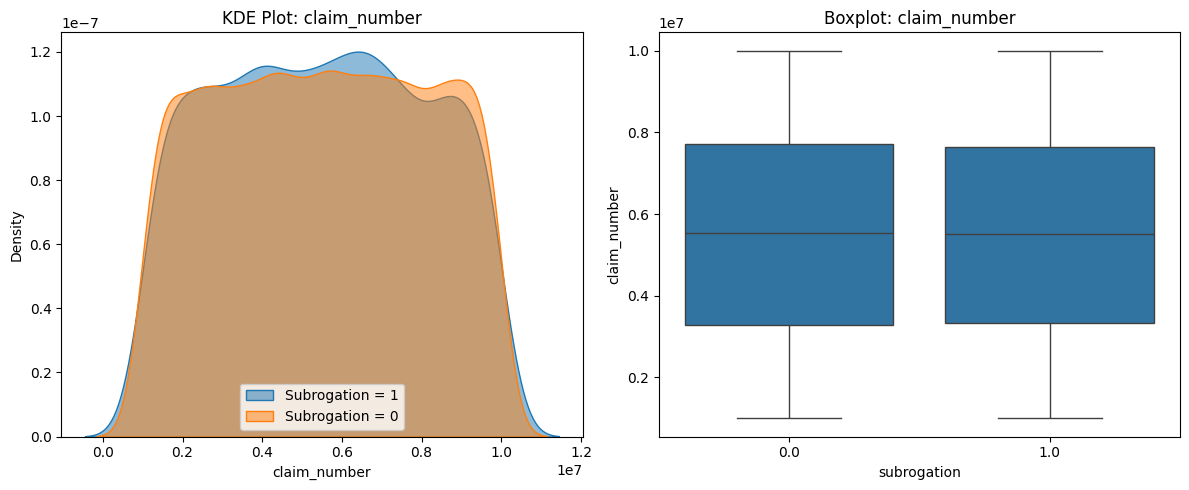

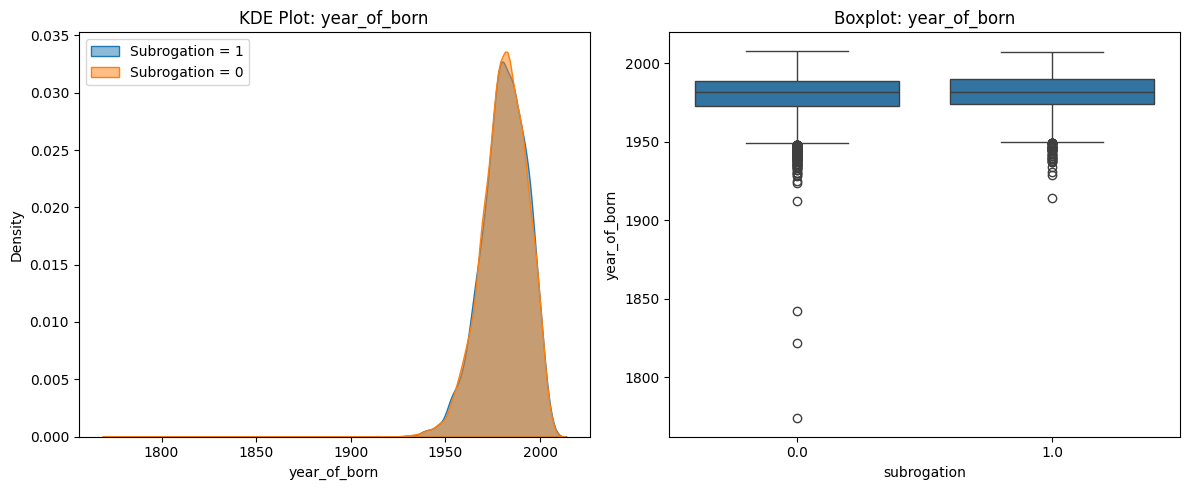

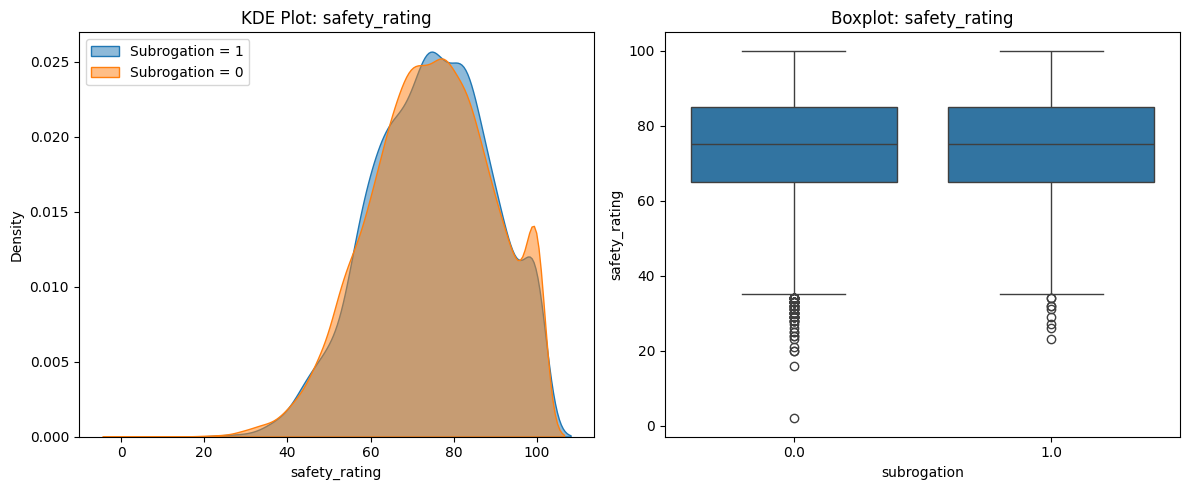

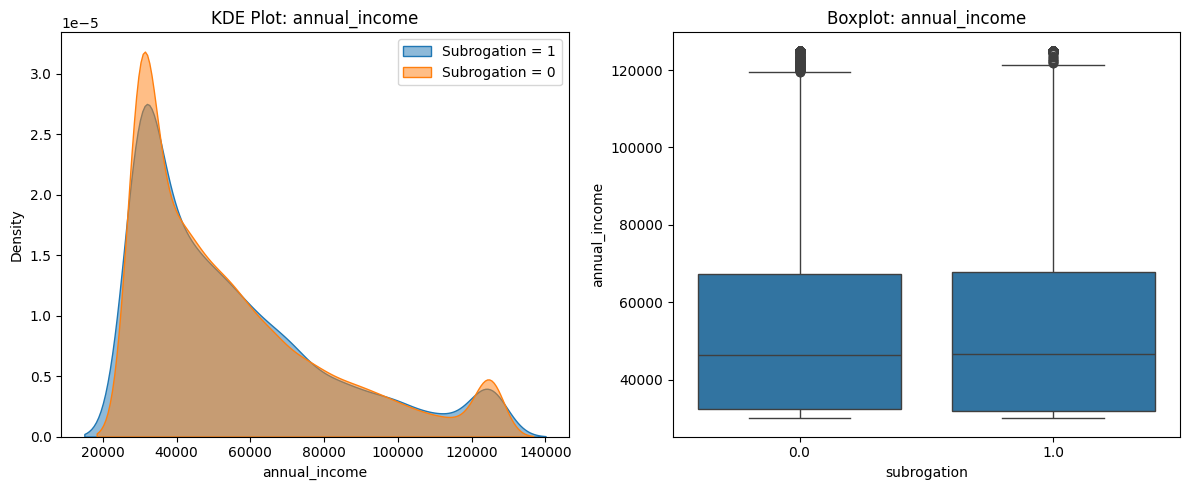

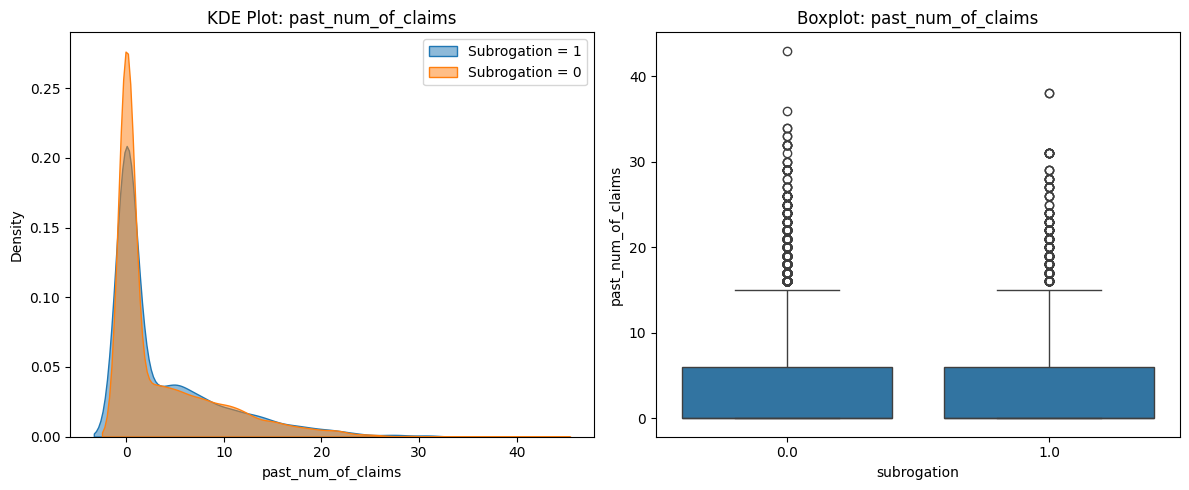

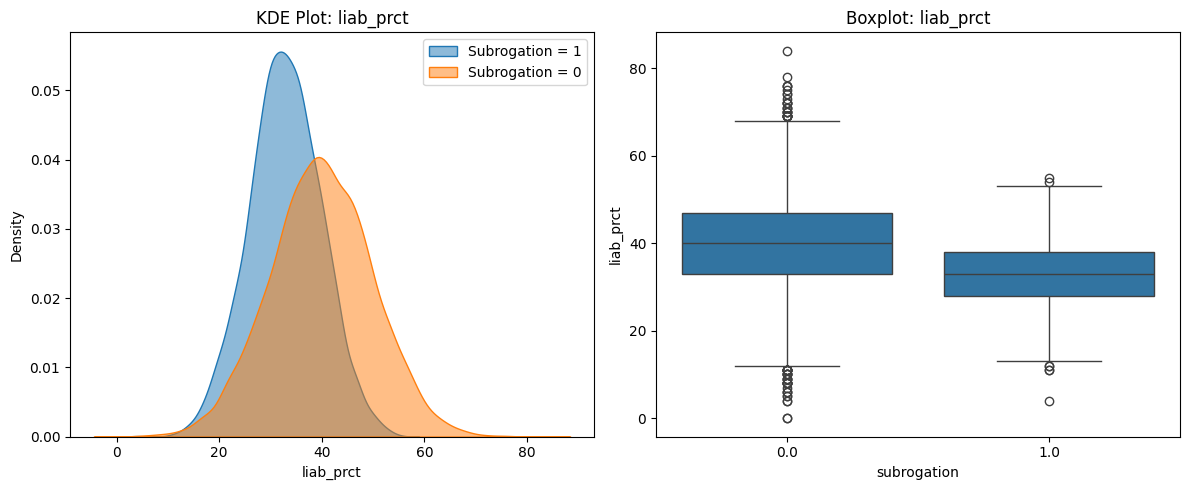

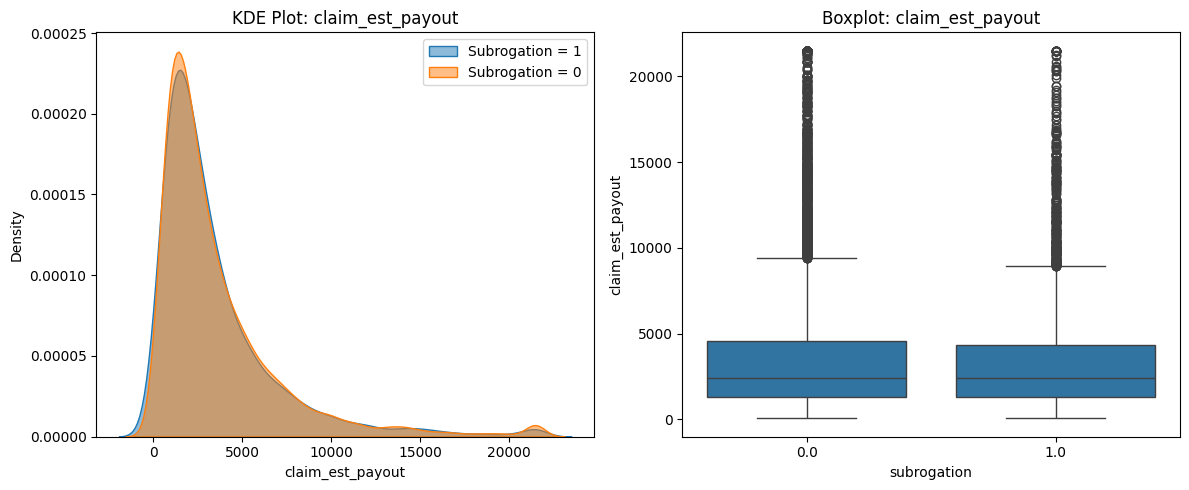

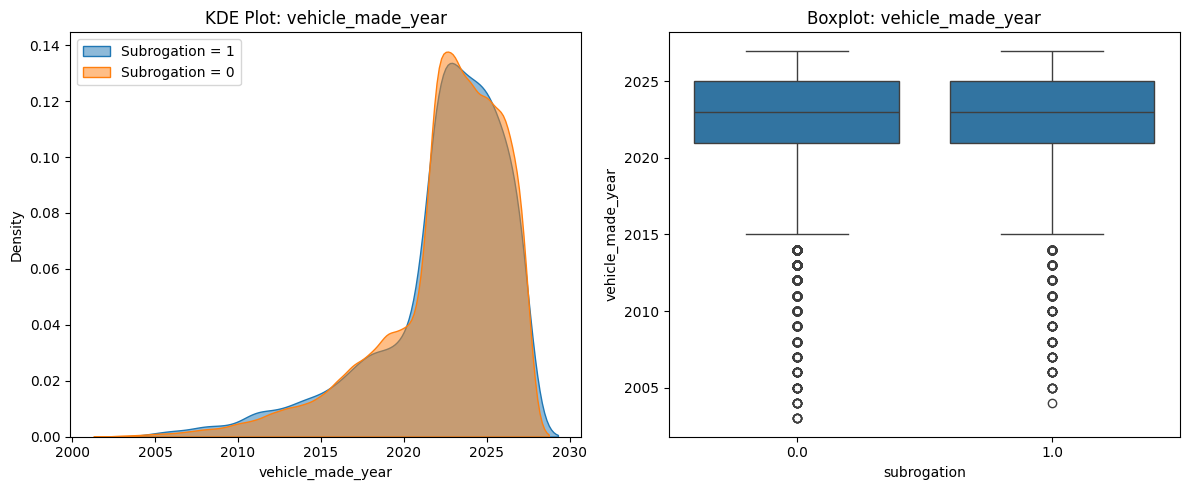

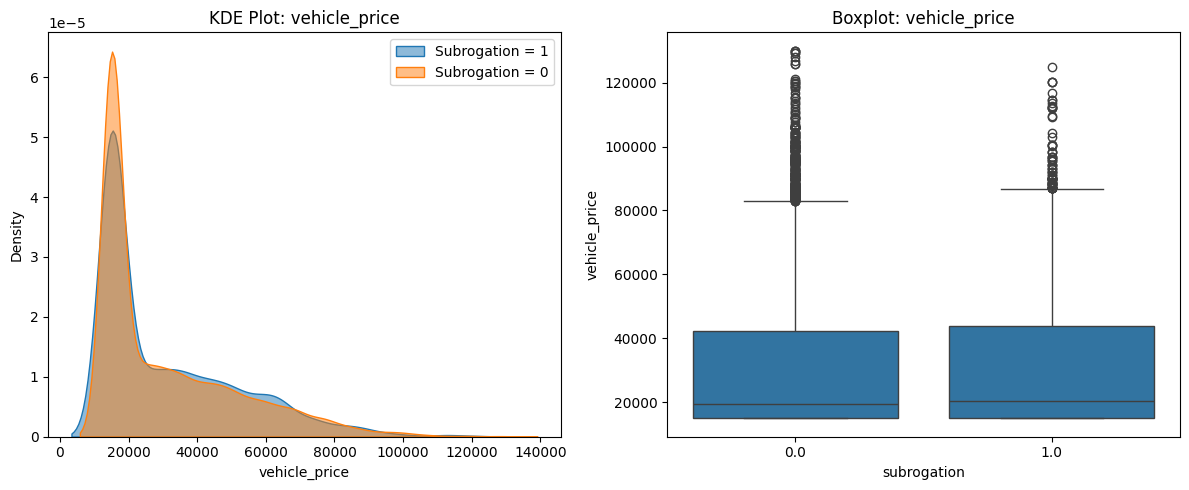

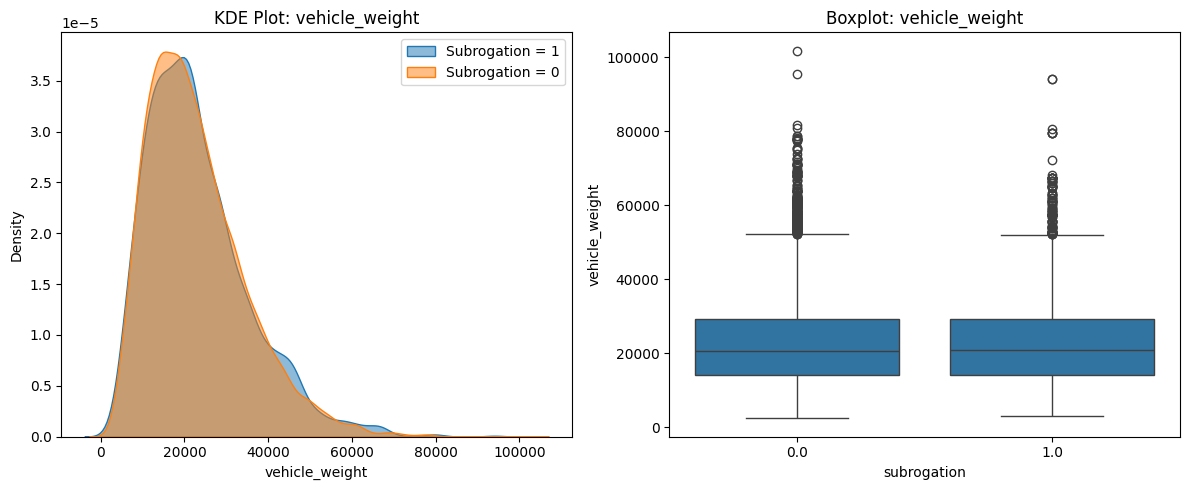

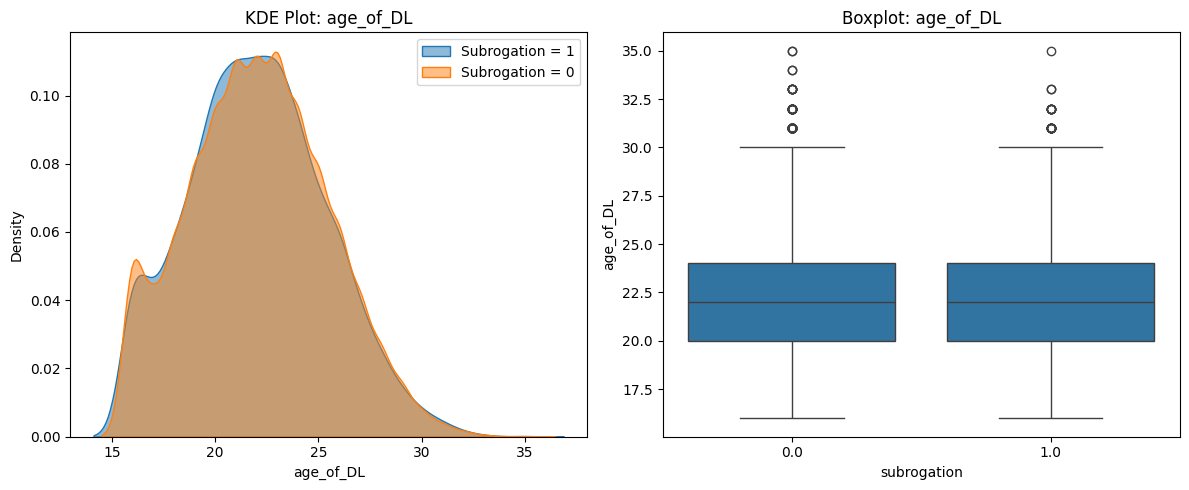

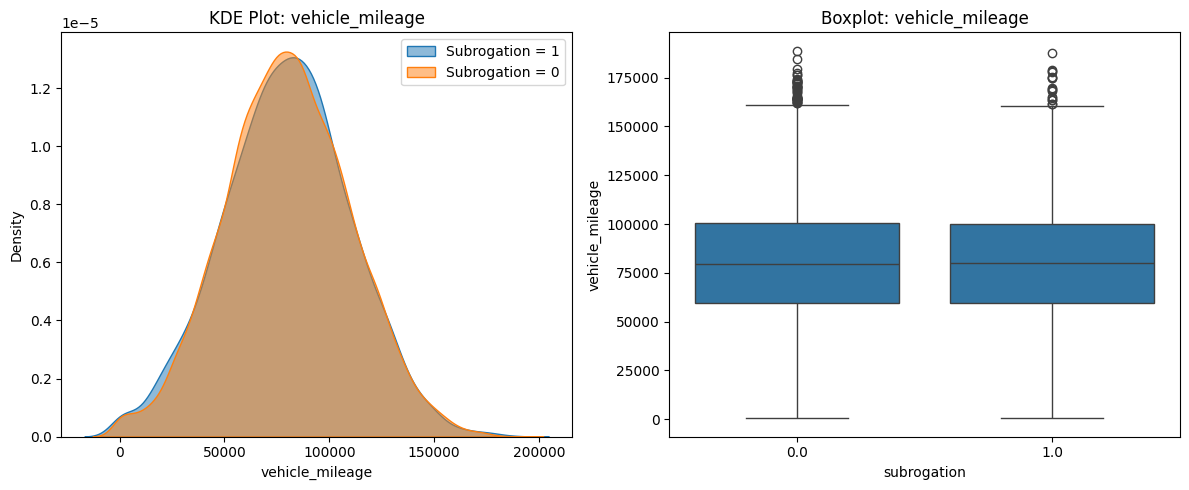

In [32]:
for col in numerical_vars:
    plot_distribution(col)

In [39]:
def plot_categorical(col):
    plt.figure(figsize=(10, 5))

    # proportion per category
    overall_ratio = df[col].value_counts(normalize=True)
    sub_ratio     = df_sub[col].value_counts(normalize=True)
    nosub_ratio   = df_nosub[col].value_counts(normalize=True)

    # Build a new DataFrame with groups on x-axis
    ratio_df = pd.DataFrame({
        "No Sub": nosub_ratio,
        "Sub": sub_ratio,
        "Total": overall_ratio
    }).fillna(0)

    # Transpose so x-axis = group names
    ratio_df = ratio_df.T   # rows: groups, columns: categories

    # Plot
    ratio_df.plot(kind="bar", figsize=(10, 5))
    plt.title(f"Category Proportions for: {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


<Figure size 1000x500 with 0 Axes>

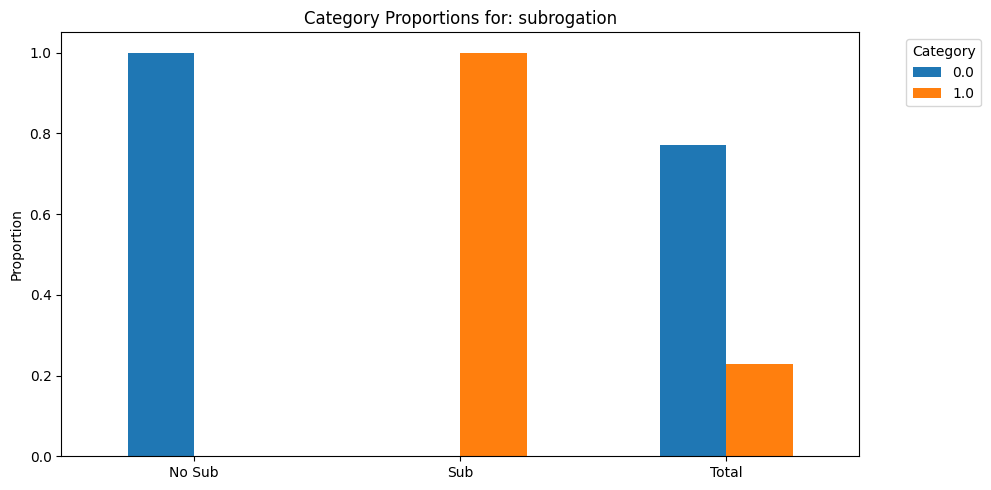

<Figure size 1000x500 with 0 Axes>

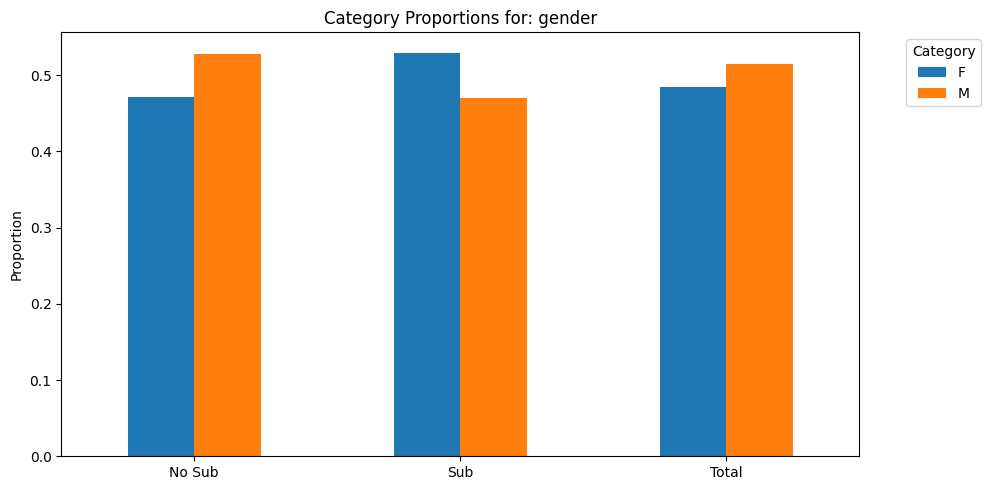

<Figure size 1000x500 with 0 Axes>

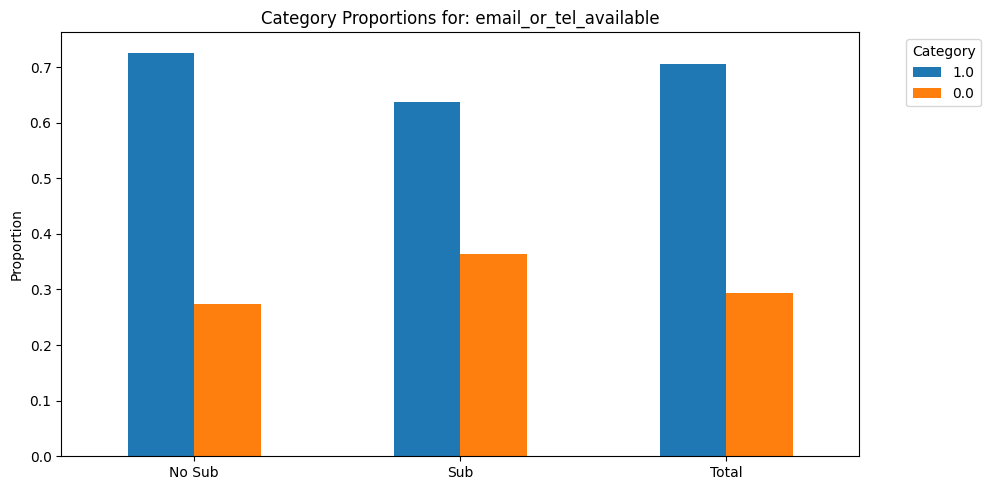

<Figure size 1000x500 with 0 Axes>

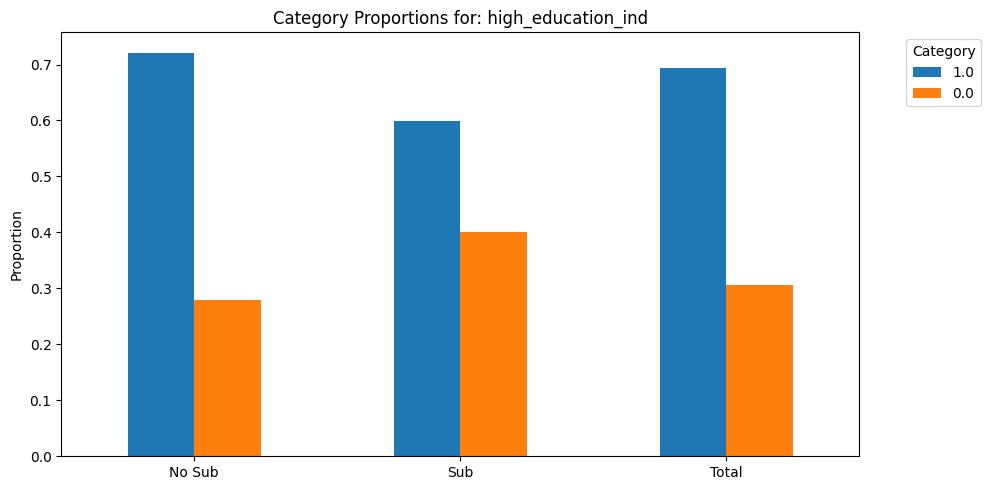

<Figure size 1000x500 with 0 Axes>

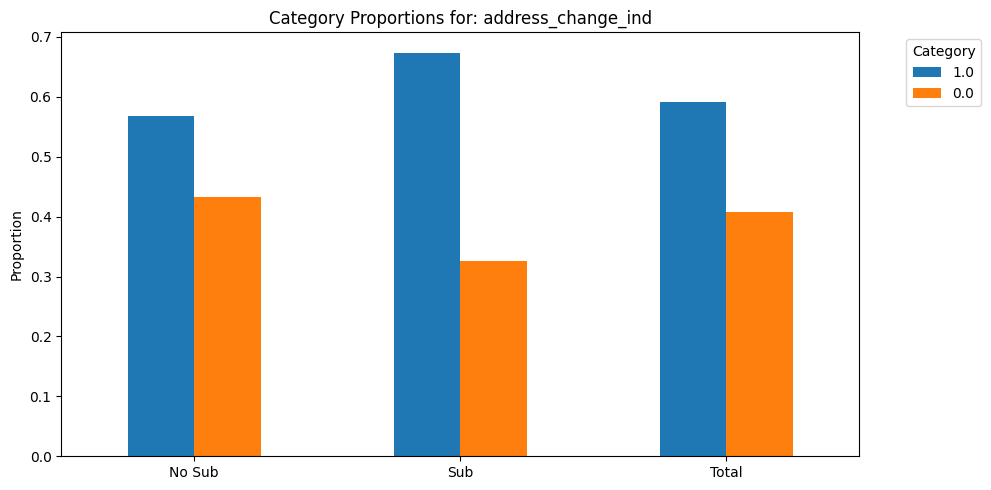

<Figure size 1000x500 with 0 Axes>

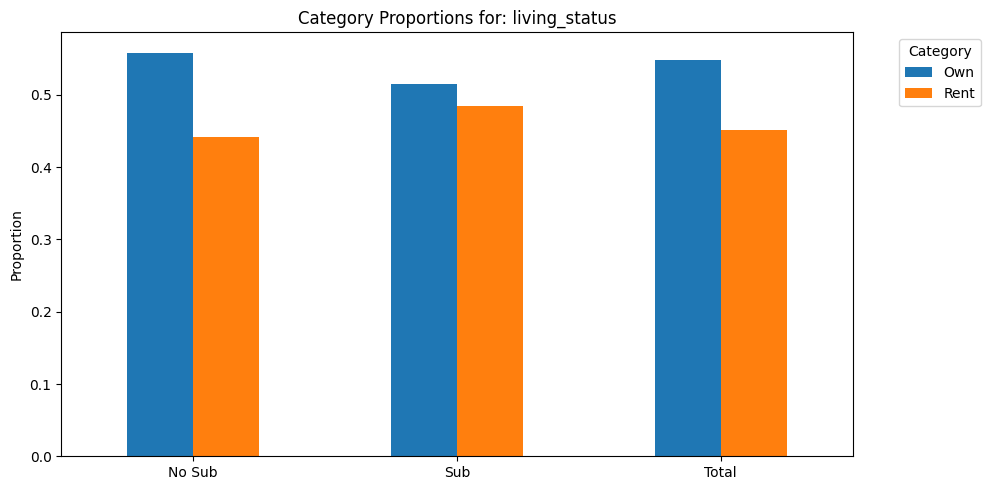

/tmp/ipython-input-2806556509.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

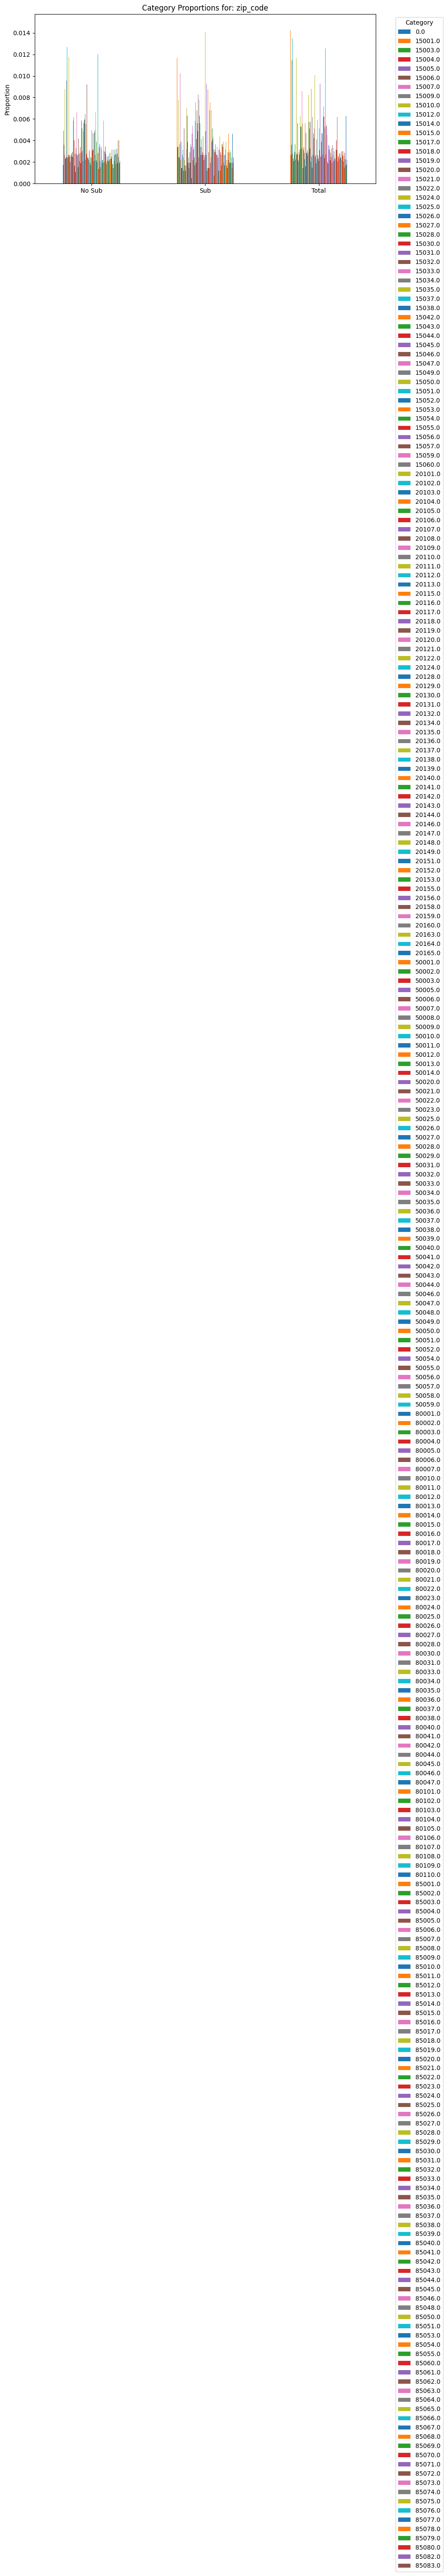

<Figure size 1000x500 with 0 Axes>

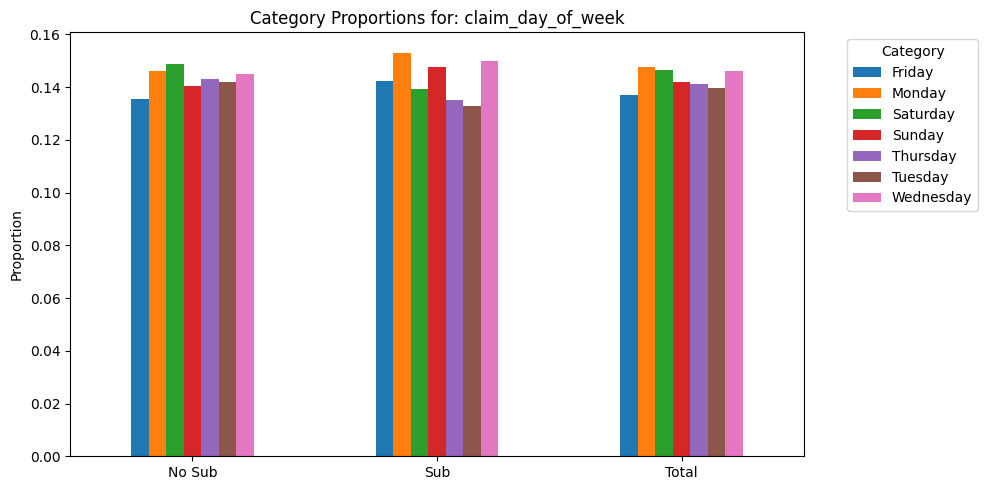

<Figure size 1000x500 with 0 Axes>

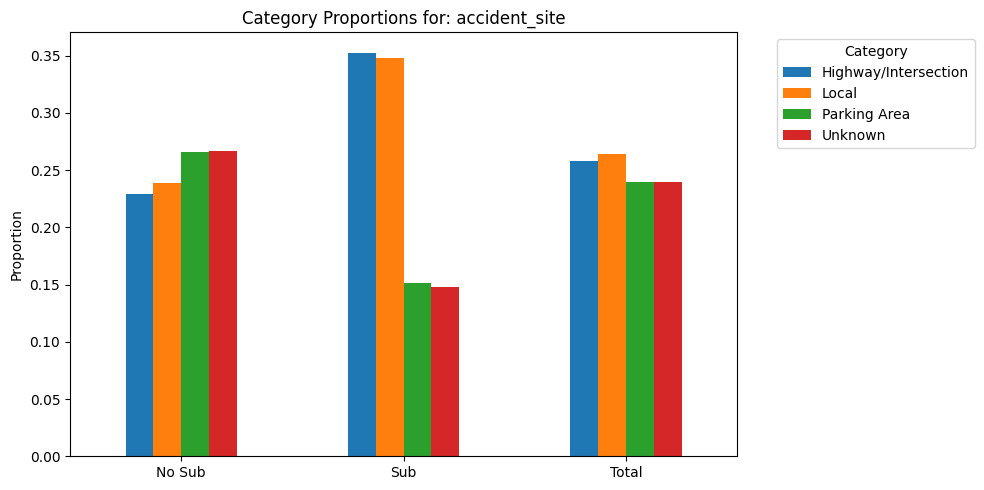

<Figure size 1000x500 with 0 Axes>

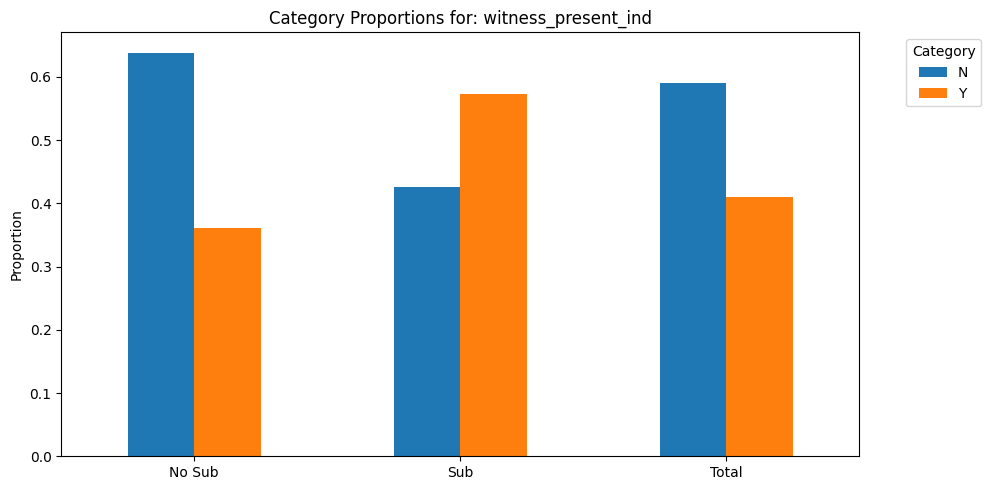

<Figure size 1000x500 with 0 Axes>

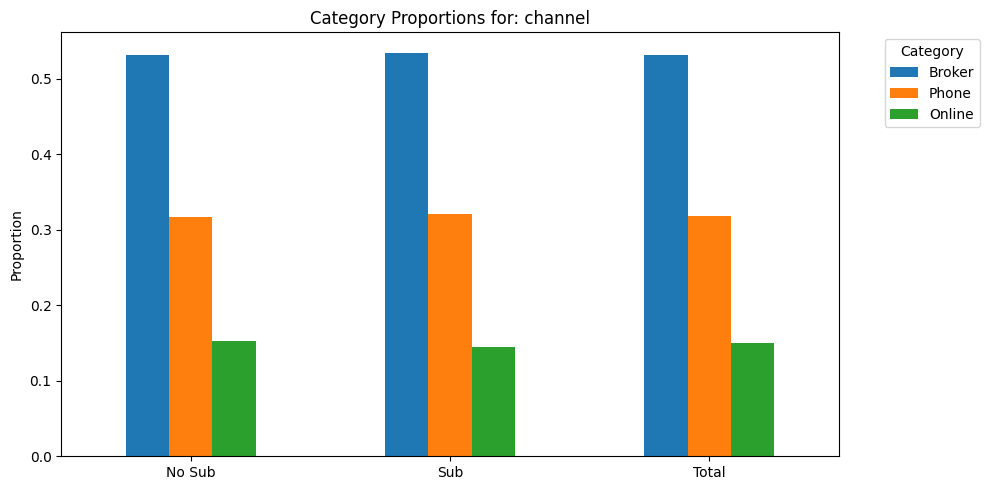

<Figure size 1000x500 with 0 Axes>

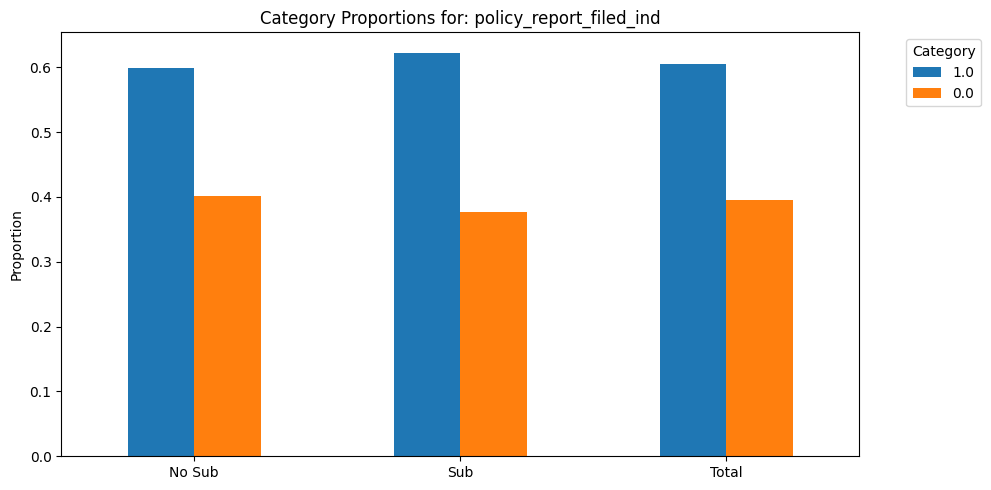

<Figure size 1000x500 with 0 Axes>

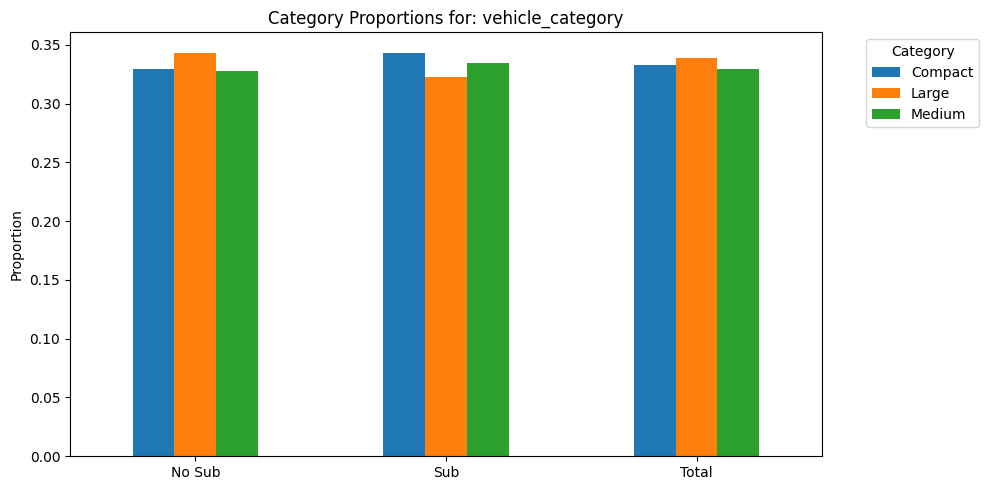

<Figure size 1000x500 with 0 Axes>

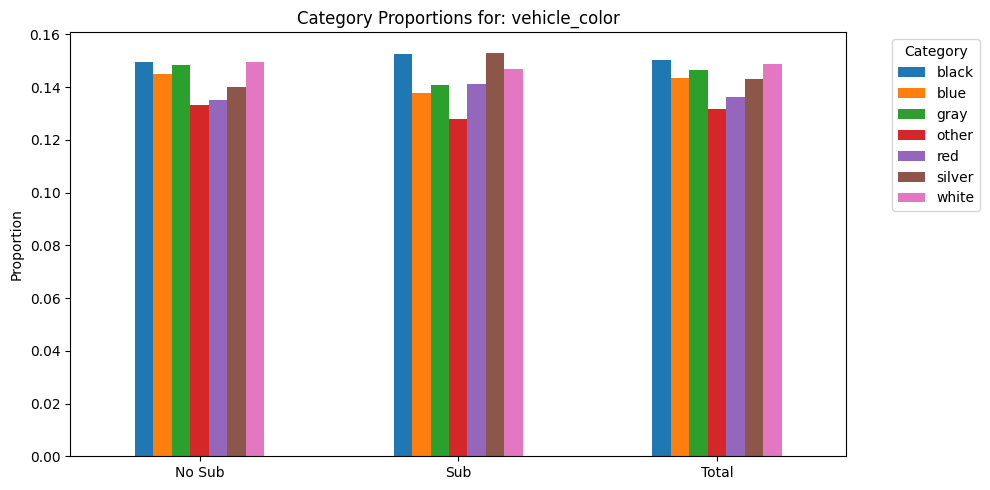

<Figure size 1000x500 with 0 Axes>

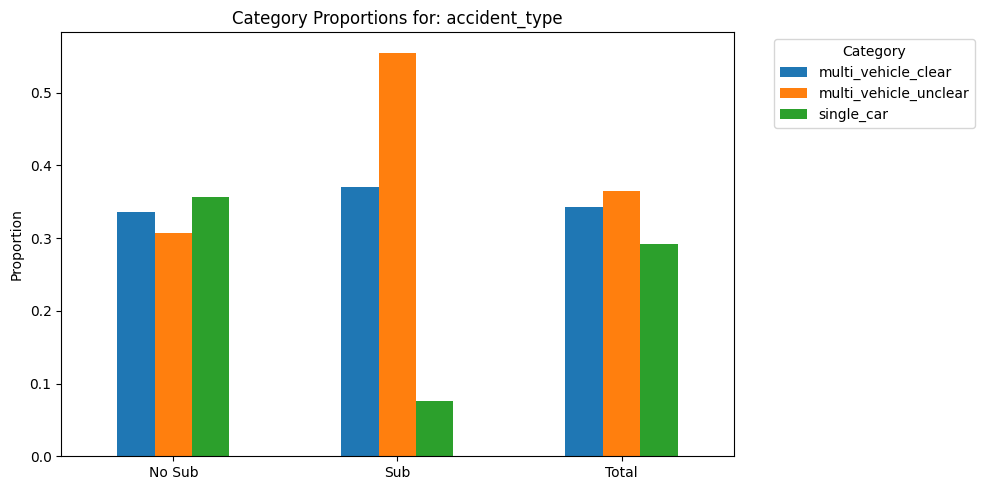

<Figure size 1000x500 with 0 Axes>

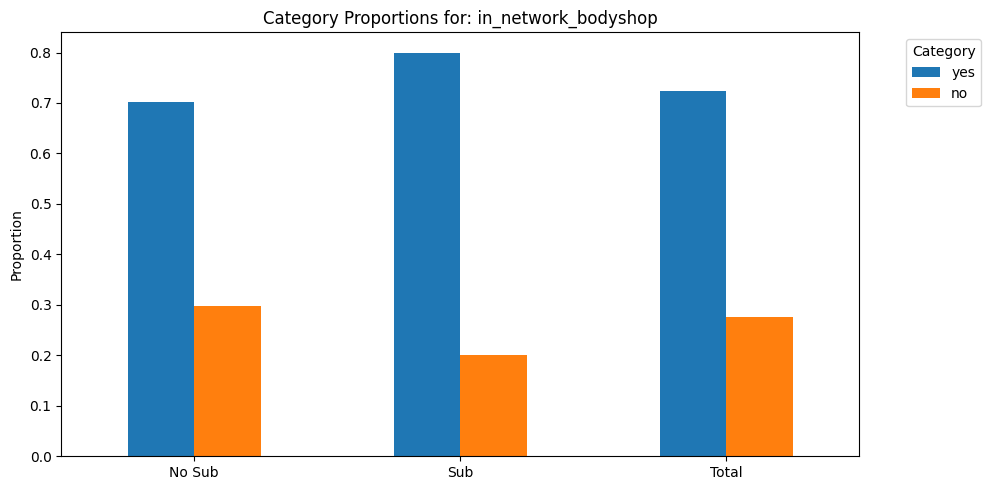

In [40]:
for col in categorical_vars:
    plot_categorical(col)

# Important Numerical Columns

## Most Important
Liab-Pct

### Maybe Important
Vehicle Price, Past number of Claims
They had a different in peak spike

# Important Categorical Columns

## Most Important
Accident cite, Witness Present, Accident type

### Maybe Important
In network body shop, living status, higher education, gender

## Must be careful not to overfit on the training as they will probably put false ideas in the training